In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

df1 = pd.read_csv('futures_prices.csv', index_col = [0], parse_dates=['Date'])
df2 = pd.read_csv('futures_volumes.csv', index_col = [0], parse_dates=['Date'])

# print(df1)
# print(df2)

In [2]:
import numpy as np

df2['Sum'] = df2[['Foreign', 'Dealer', 'Domestic']].sum(axis = 1)
df2['Ratio'] = df2['Sum'] / df2['Total'] * -1

X = 0.2
Y = 0.05

In [3]:
def strategy(C, X = 0.2, Y = 0.05):
    if C > X:
        return -1
    elif C < Y:
        return 1
    else:
        return 0

In [4]:
df2['Signal'] = df2.Ratio.apply(strategy, X = 0.2, Y = 0.05)

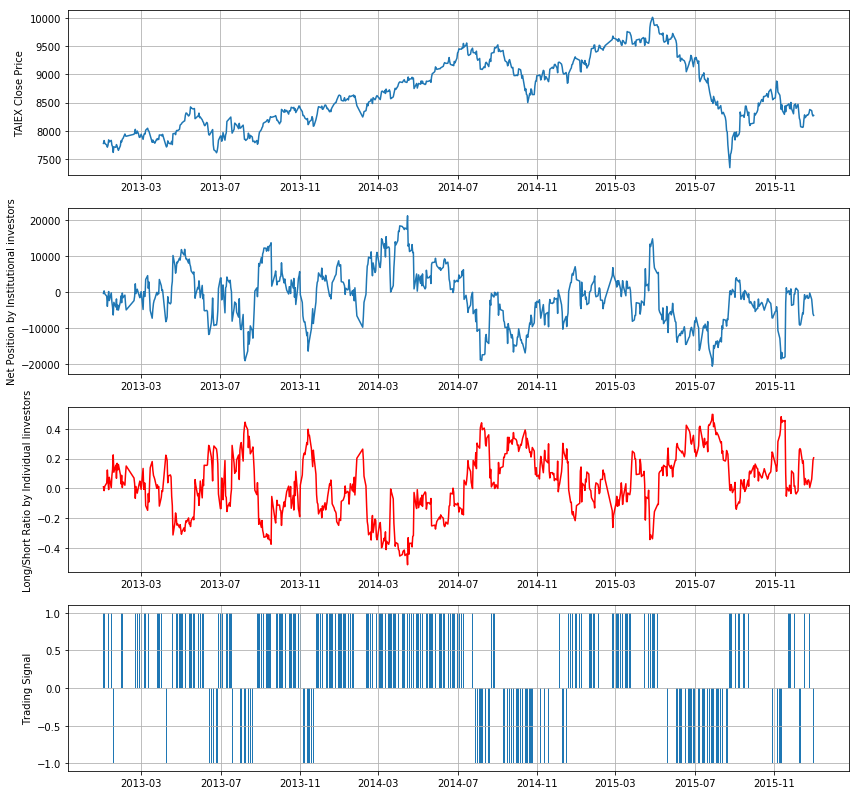

In [5]:
fig = plt.figure(figsize = (14, 14))

ax0 = fig.add_subplot(411)
ax0.plot(df1['Close'])
ax0.grid(True)
ax0.set_ylabel('TAIEX Close Price')

ax1 = fig.add_subplot(412)
ax1.plot(df2['Sum'])
ax1.grid(True)
ax1.set_ylabel('Net Position by Institutional investors')

ax2 = fig.add_subplot(413)
ax2.plot(df2['Ratio'], color = 'r')
ax2.grid(True)
ax2.set_ylabel('Long/Short Ratio by Individual Iinvestors')

ax3 = fig.add_subplot(414)
plt.bar(df2.index, df2['Signal'])
ax3.grid(True)
ax3.set_ylabel('Trading Signal')

fig.show()

In [6]:
df2['Open'] = df1['Open'].values
df2['Close'] = df1['Close'].values
(rows, cols) = df1.shape
df2['Profit'] = np.zeros((rows, 1))

for i in range(0, rows - 2):
    df2['Profit'][i] = df2['Signal'][i] * (df2['Open'][i + 2] - df2['Open'][i + 1]) * 200

print(df2[['Open', 'Ratio', 'Signal', 'Profit']][:10])

            Open     Ratio  Signal   Profit
Date                                       
2013-01-02  7720  0.009842       1  -2200.0
2013-01-03  7811 -0.015899       1 -11400.0
2013-01-04  7800  0.013126       1  -2200.0
2013-01-07  7743  0.035363       1  -9200.0
2013-01-08  7732  0.122904       0      0.0
2013-01-09  7686  0.049108       1  20200.0
2013-01-10  7762 -0.008646       1 -26600.0
2013-01-11  7863  0.073767       0      0.0
2013-01-14  7730  0.003946       1 -10000.0
2013-01-15  7800  0.085263       0      0.0


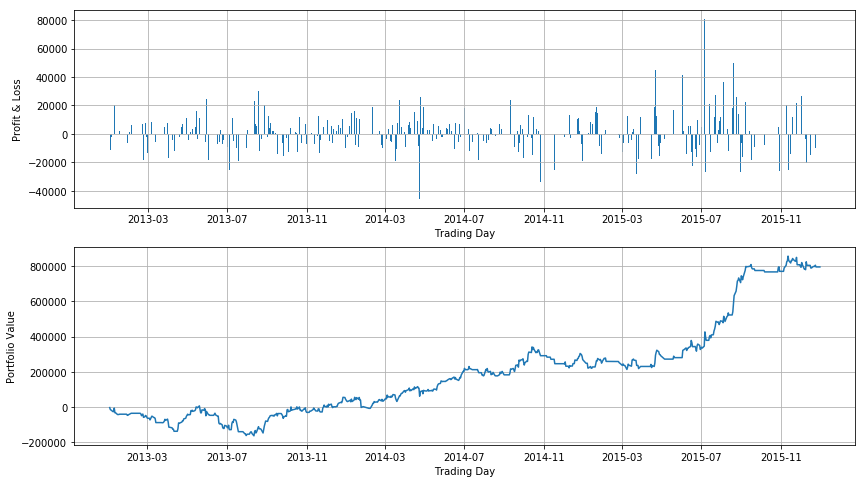

In [7]:
f = plt.figure(figsize = (14, 8))
ax1 = f.add_subplot(211)
ax1.bar(df2.index, df2['Profit'])
ax1.set_xlabel('Trading Day')
ax1.set_ylabel('Profit & Loss')
ax1.grid(True)

df2['PV'] = df2['Profit'].cumsum()

ax2 = f.add_subplot(212)
ax2.plot(df2.index, df2['PV'])
ax2.set_xlabel('Trading Day')
ax2.set_ylabel('Portfolio Value')
ax2.grid(True)